# Exploring Network Metrics in Football: A Longitudinal Analysis of Passing Networks and Team Performance



This notebook is a step by step representation of the processes involved in calculating network measures produced from passing networks of each team in the English Premier League in the 17/18 season. The network measures are then tested in a mixed-effects linear regression model to observe its relationship with team performances, represented by the number of goals a team scores. 

Dataset - the dataset contains all events that occur in all matches of the English Premier League season of 2017/2018. It is accessible through (Pappalardo and Massucco, 2019).

Null hypothesis - there is no relationship between network metrics produced from passing networks of football teams, and the number of goals scored by teams.

Alternate Hypothesis - there is a relationship between network metrics produced from passing networks of football teams, and the number of goals scored by teams.


Statistical Test - a mixed-effects linear regression model is selected to test out the hypothesis. This model is selected because it takes into account random effects, such as varations due to match and team, as well as taking into account opposition network metrics as well. 



# Order of contents:
- #### Read the datasets
    - Four seperate datasets containing different information of the 17/18 English Premier League are merged using common keys.
- #### Exploratory Data Analysis
    - Investigate the resultant dataset post merging
- #### Data processing
    - The data is processed further to make it viable to construct and plot a simple passing network for a team without spatio-temporal data
- #### Network metrics
    - Calculate network metrics of one match from a team's passing network.
    - Add average x,y co-ordinates to the passing network and re-calculate the passing network metrics to see if there is a difference.
- #### Plotting graphs using x,y co-ordinates
    - Visualize a team's passing network using average x,y co-ordinates for each node (player) to explore any possible insights.
- #### Calculate network metrics for all matches
    - The processes described to construct passing networks to calculate network metrics of one match is extended to calculate network metrics for all matches.
        - First Iteration - code involving the first approach to calculate network metrics for all matches
        - Testing - mixed-effects linear regression model to test the relationship between network metrics calculated and goals scored by team
        - Second Iteration - improved and corrected first approach
        - Testing - same mixed-effects linear regression model, different results
- #### Conclusion

# Read the datasets

The data sets were made available by (post source here)

In [2]:
import pandas as pd

In [3]:
event_df = pd.read_csv('events_eng.csv')

In [4]:
match_df = pd.read_csv('matches_eng.csv')

In [5]:
player_df = pd.read_csv('player.csv')

In [6]:
teams_df = pd.read_csv('teams.csv')

In [7]:
# Merge matches and events dataframes
merged_df = pd.merge(event_df, match_df, left_on='matchId',right_on='wyId')

In [8]:
#left join playermerged_df   
test2 = pd.merge(merged_df, player_df, how='left', left_on='playerId', right_on='wyId')

In [9]:
#merge team info
merged_df = pd.merge(test2,teams_df,how='left',left_on='currentTeamId',right_on='wyId')

# Exploratory Data Analysis

The final dataframe  has the information of all matches in the 17/18 season of the English Premier League.

The dataframe has the following columns:

In [10]:
merged_df.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'status', 'roundId', 'gameweek', 'teamsData', 'seasonId', 'dateutc',
       'winner', 'venue', 'wyId_x', 'label', 'date', 'referees', 'duration',
       'competitionId', 'passportArea', 'weight', 'firstName', 'middleName',
       'lastName', 'currentTeamId', 'birthDate', 'height', 'role', 'birthArea',
       'wyId_y', 'foot', 'shortName', 'currentNationalTeamId', 'city', 'name',
       'wyId', 'officialName', 'area', 'type'],
      dtype='object')





The dataset looks like :

In [11]:
merged_df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,wyId_y,foot,shortName,currentNationalTeamId,city,name,wyId,officialName,area,type
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,...,25413.0,right,A. Lacazette,NaN,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,...,370224.0,right,R. Holding,NaN,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,...,3319.0,left,M. \u00d6zil,3148.0,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,...,120339.0,right,Mohamed Elneny,16129.0,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,...,167145.0,right,Beller\u00edn,NaN,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,...,70965.0,right,Jo\u00e3o M\u00e1rio,9905.0,Milano,Internazionale,3161.0,FC Internazionale Milano,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,...,7919.0,right,M. Keane,2413.0,Liverpool,Everton,1623.0,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,...,8005.0,right,J. Collins,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 643150 events that are recorded across the all matches in the 17/18 season.

In [12]:
len(merged_df.matchId.unique())

380

There are 380 matches in the dataset. With 20 teams in the EPL, each team plays the other 19 teams twice a season.

Let's take a look at the most common events that took place across all matches:

In [13]:
merged_df.eventName.value_counts()

Pass                       328657
Duel                       176688
Others on the ball          51085
Free Kick                   36423
Interruption                27535
Shot                         8451
Foul                         8138
Save attempt                 3349
Offside                      1558
Goalkeeper leaving line      1266
Name: eventName, dtype: int64

The most common action/event that takes place across all matches is the "Pass" action with 328657 such events taking place across all matches in the season.

Let's take a deeper look at "Pass" as its most common action that occurs. 

In [14]:
# Filter to keep only pass events
passes_df = merged_df[merged_df['eventName'] == 'Pass']

Dataset that contains only passing actions:

In [15]:
passes_df.head(3)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,wyId_y,foot,shortName,currentNationalTeamId,city,name,wyId,officialName,area,type
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,...,25413.0,right,A. Lacazette,NaN,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,...,370224.0,right,R. Holding,NaN,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,...,3319.0,left,M. \u00d6zil,3148.0,London,Arsenal,1609.0,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [16]:
passes_df.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'status', 'roundId', 'gameweek', 'teamsData', 'seasonId', 'dateutc',
       'winner', 'venue', 'wyId_x', 'label', 'date', 'referees', 'duration',
       'competitionId', 'passportArea', 'weight', 'firstName', 'middleName',
       'lastName', 'currentTeamId', 'birthDate', 'height', 'role', 'birthArea',
       'wyId_y', 'foot', 'shortName', 'currentNationalTeamId', 'city', 'name',
       'wyId', 'officialName', 'area', 'type'],
      dtype='object')

Deeper look at all columns not shown above:

In [17]:
passes_df[['subEventId', 'id',
       'status', 'roundId', 'gameweek', 'teamsData', 'seasonId', 'dateutc',
       'winner', 'venue', 'wyId_x', 'label', 'date', 'referees', 'duration',]].head(3)

,subEventId,id,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId_x,label,date,referees,duration
0,85.0,177959171,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,2499719,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular
1,83.0,177959172,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,2499719,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular
2,82.0,177959173,Played,4405654,1,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2017-08-11 18:45:00,1609,Emirates Stadium,2499719,"Arsenal - Leicester City, 4 - 3","August 11, 2017 at 8:45:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular


In [18]:
passes_df[[  'competitionId', 'passportArea', 'weight', 'firstName', 'middleName',
       'lastName', 'currentTeamId', 'birthDate', 'height', 'role', 'birthArea',]].head(3)

,competitionId,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea
0,364,"{'name': 'Guadeloupe', 'id': 312, 'alpha3code'...",73.0,Alexandre,NaN,Lacazette,1609.0,1991-05-28,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F..."
1,364,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",75.0,Rob,NaN,Holding,1609.0,1995-09-20,189.0,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'England', 'id': 0, 'alpha3code': 'XE..."
2,364,"{'name': 'Germany', 'id': '276', 'alpha3code':...",76.0,Mesut,NaN,\u00d6zil,1609.0,1988-10-15,180.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'Germany', 'id': '276', 'alpha3code':..."


After taking a deeper look at all the columns, here are the important columns:
- playerId, unique identification of the player
- firstName, first name of player
- lastName, last name of player
- positions, the x,y cordinataes of the event (of passes in this case)
- matchId, unique identification for each match
- teamId, unique identification for the team
- eventName, the name of the action (in this case it will only be "Pass"
- subEventName, gives more detail to eventName
- label, can extract team names and number of goals for each team from this column

Now that we have a data frame with passing information only. Now, it's time to start working towards creating a passing network. 

However, before a passing network can be created, further pre-processing needs to be done.

# Data Processing

Since there are so many columns still present in 'passes_df' that we don't need, let's focus on relevant columns that are needed for creating the passing network.


First the columns 'firstName' and 'lastName' are combined into a column called 'playerName'. 

In [19]:
passes_df['playerName'] = passes_df.firstName + ' ' + passes_df.lastName


Then, a new data frame called 'pass_df' is created where only the columns 'playerId', 'playerName','teamId','officialName', 'matchId', 'eventName', 'label', 'positions' are selected.

After, the 'positions' column is used to extract the x,y coordinates are selected into two seperate columns called 'x' and 'y' respectively. Finally, the 'positions' column is dropped.

In [20]:
import json

In [21]:
import ast

In [22]:
# Convert the column to a list of dictionaries
passes_df['positions'] = passes_df['positions'].apply(ast.literal_eval)

In [23]:
# select the relevant columns
pass_df = passes_df[['playerId', 'playerName','teamId','officialName', 'matchId', 'eventName', 'label', 'positions']]

# filter for only passes
pass_df = pass_df[pass_df['eventName'] == 'Pass']


# extract the pass coordinates
pass_df['x'] = pass_df['positions'].apply(lambda x: x[0]['x'])
pass_df['y'] = pass_df['positions'].apply(lambda x: x[0]['y'])

# drop the positions column
pass_df = pass_df.drop('positions', axis=1)

Here's what the final 'pass_df' dataframe looks like:

In [24]:
pass_df.head(5)

,playerId,playerName,teamId,officialName,matchId,eventName,label,x,y
0,25413,Alexandre Lacazette,1609,Arsenal FC,2499719,Pass,"Arsenal - Leicester City, 4 - 3",49,49
1,370224,Rob Holding,1609,Arsenal FC,2499719,Pass,"Arsenal - Leicester City, 4 - 3",31,78
2,3319,Mesut \u00d6zil,1609,Arsenal FC,2499719,Pass,"Arsenal - Leicester City, 4 - 3",51,75
3,120339,Mohamed Naser Elsayed Elneny,1609,Arsenal FC,2499719,Pass,"Arsenal - Leicester City, 4 - 3",35,71
4,167145,H\u00e9ctor Beller\u00edn Moruno,1609,Arsenal FC,2499719,Pass,"Arsenal - Leicester City, 4 - 3",41,95


### Creating a passing network for one match

The following code is to work on one match, with the id 2499719. Following that we can create a loop and work on every match.

In [25]:
test_df = pass_df[pass_df.matchId==2499720.0]

Here's what the pass dataframe for one match looks like. You can see that there are passes from players involving only 2 teams.

In [26]:
test_df

,playerId,playerName,teamId,officialName,matchId,eventName,label,x,y
1768,8325,Sergio Leonel Ag\u00fcero del Castillo,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",49,53
1769,105339,Fernando Luiz Rosa,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",36,51
1770,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,30
1771,8307,Vincent Kompany,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,79
1772,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,24
...,...,...,...,...,...,...,...,...,...
3356,265673,Bernardo Mota Veiga de Carvalho e Silva,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",77,60
3358,466,Davy Pr\u00f6pper,1651,Brighton & Hove Albion FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,55
3359,8086,Dale Stephens,1651,Brighton & Hove Albion FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",27,28
3366,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",66,46


In order to create a passing network, we need to know the player that recieves that pass too. The current dataframe lacks that information. However, given that the dataframe contains event data arranged in sequential order, one possible solution is to shift the player listed in the next row up by one position. The player that is shifted can be considered to be the recipient of the pass. This approach enables us to establish a connection between the passer and receiver for each pass event.

In [27]:
#find pass reciever using shift(-1)
test_df[["receiver",'reciever_name','reciever_teamId']] = test_df[['playerId','playerName','teamId']].shift(-1)
test_df

,playerId,playerName,teamId,officialName,matchId,eventName,label,x,y,receiver,reciever_name,reciever_teamId
1768,8325,Sergio Leonel Ag\u00fcero del Castillo,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",49,53,105339.0,Fernando Luiz Rosa,1625.0
1769,105339,Fernando Luiz Rosa,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",36,51,70086.0,Nicol\u00e1s Hern\u00e1n Otamendi,1625.0
1770,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,30,8307.0,Vincent Kompany,1625.0
1771,8307,Vincent Kompany,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,79,70086.0,Nicol\u00e1s Hern\u00e1n Otamendi,1625.0
1772,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,24,9380.0,John Stones,1625.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3356,265673,Bernardo Mota Veiga de Carvalho e Silva,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",77,60,466.0,Davy Pr\u00f6pper,1651.0
3358,466,Davy Pr\u00f6pper,1651,Brighton & Hove Albion FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,55,8086.0,Dale Stephens,1651.0
3359,8086,Dale Stephens,1651,Brighton & Hove Albion FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",27,28,70086.0,Nicol\u00e1s Hern\u00e1n Otamendi,1625.0
3366,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",66,46,265673.0,Bernardo Mota Veiga de Carvalho e Silva,1625.0


By implementing the approach of shifting the subsequent row up by one to find the recipient of the pass, it becomes apparent that there are instances where the recipient belongs to the opposition team. Such cases indicate unsuccessful passes. As our objective is to construct a passing network based on successful passes only, it is advisable to remove these rows from the dataset.

In [28]:
# drop unsuccessful passes

# drop rows where teamId does not equal reciever_teamId
mask = test_df['teamId'] != test_df['reciever_teamId']
filtered_df = test_df[mask]
test_df = test_df.drop(index=filtered_df.index)

In [29]:
test_df.head(10)

,playerId,playerName,teamId,officialName,matchId,eventName,label,x,y,receiver,reciever_name,reciever_teamId
1768,8325,Sergio Leonel Ag\u00fcero del Castillo,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",49,53,105339.0,Fernando Luiz Rosa,1625.0
1769,105339,Fernando Luiz Rosa,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",36,51,70086.0,Nicol\u00e1s Hern\u00e1n Otamendi,1625.0
1770,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,30,8307.0,Vincent Kompany,1625.0
1771,8307,Vincent Kompany,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,79,70086.0,Nicol\u00e1s Hern\u00e1n Otamendi,1625.0
1772,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,24,9380.0,John Stones,1625.0
1773,9380,John Stones,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",38,52,8307.0,Vincent Kompany,1625.0
1774,8307,Vincent Kompany,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",41,80,8325.0,Sergio Leonel Ag\u00fcero del Castillo,1625.0
1775,8325,Sergio Leonel Ag\u00fcero del Castillo,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",68,66,8325.0,Sergio Leonel Ag\u00fcero del Castillo,1625.0
1780,255935,Isaiah Brown,1651,NaN,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",41,6,255935.0,Isaiah Brown,1651.0
1794,255935,Isaiah Brown,1651,NaN,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",38,11,3657.0,Tomer Hemed,1651.0


There are still some instances where the passer and reciever are the same. Let's remove these rows since they are not considered to be passes.

In [30]:
#drop a few more rows where passer and reciever are the same
test_df = test_df.drop(index=test_df[test_df.playerName==test_df.reciever_name].index)

In [31]:
test_df.officialName.unique()

array(['Manchester City FC', nan, 'Brighton & Hove Albion FC'],
      dtype=object)

In [32]:
test_df.teamId.unique()

array([1625, 1651])

The objective is to split the dataframe into the 2 teams. However, it's advisable to split using teamId instead of the column 'officialName' because it has NaN values.

In [33]:
team1_df = test_df[test_df.teamId==test_df.teamId.unique()[0]]
team2_df = test_df[test_df.teamId==test_df.teamId.unique()[1]]

Here's what team1_df looks like:

In [34]:
team1_df.head()

,playerId,playerName,teamId,officialName,matchId,eventName,label,x,y,receiver,reciever_name,reciever_teamId
1768,8325,Sergio Leonel Ag\u00fcero del Castillo,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",49,53,105339.0,Fernando Luiz Rosa,1625.0
1769,105339,Fernando Luiz Rosa,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",36,51,70086.0,Nicol\u00e1s Hern\u00e1n Otamendi,1625.0
1770,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,30,8307.0,Vincent Kompany,1625.0
1771,8307,Vincent Kompany,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,79,70086.0,Nicol\u00e1s Hern\u00e1n Otamendi,1625.0
1772,70086,Nicol\u00e1s Hern\u00e1n Otamendi,1625,Manchester City FC,2499720,Pass,"Brighton & Hove Albion - Manchester City, 0 - 2",28,24,9380.0,John Stones,1625.0


The current team dataframes still contain sequential information about passes. But in order to create a pass network, we need to aggregate the data. The following approach aggregates each player's average x,y coordinate for both teams as seperate dataframes.

In [35]:
# find the average locations of the passer in team1
avg_loc_team1 = team1_df.groupby('playerName').agg({'x':['mean'], 'y': ['mean', 'count']})
avg_loc_team1.columns=['x', 'y', 'count']
avg_loc_team1

,x,y,count
playerName,,,
Bernardo Mota Veiga de Carvalho e Silva,59.083333,59.166667,12
Danilo Luiz da Silva,66.272727,12.787879,33
David Josu\u00e9 Jim\u00e9nez Silva,63.122222,51.533333,90
Ederson Santana de Moraes,13.000000,42.117647,17
Fernando Luiz Rosa,51.180723,50.469880,83
Gabriel Fernando de Jesus,65.950000,53.600000,20
John Stones,47.066667,49.900000,90
Kevin De Bruyne,63.800000,56.400000,65
Kyle Walker,62.000000,85.850000,60


In [36]:
# find the average locations of the passer for team2
avg_loc_team2 = team2_df.groupby('playerName').agg({'x':['mean'], 'y': ['mean', 'count']})
avg_loc_team2.columns=['x', 'y', 'count']
avg_loc_team2

,x,y,count
playerName,,,
Anthony Knockaert,62.000000,84.000000,2
Bruno Saltor Grau,36.000000,82.250000,16
Dale Stephens,43.800000,58.900000,10
Davy Pr\u00f6pper,50.555556,49.222222,9
Glenn Murray,49.000000,90.333333,3
Isaiah Brown,39.333333,12.833333,6
Jamie Murphy,63.600000,12.400000,5
Lewis Dunk,22.000000,24.250000,4
Markus Suttner,44.846154,14.846154,13


In [37]:
team1_df = team1_df.reset_index()


Another crucial information that can be extracted from the team dataframes that is needed to consruct a passing network is the number of passes between players. This will eventually serve as weights between players. 

In [38]:
# Number of passes between each player for team1
pass_bet_team1 = team1_df.groupby(['playerName', 'reciever_name']).index.count().reset_index()
pass_bet_team1

,playerName,reciever_name,index
0,Bernardo Mota Veiga de Carvalho e Silva,David Josu\u00e9 Jim\u00e9nez Silva,6
1,Bernardo Mota Veiga de Carvalho e Silva,Fernando Luiz Rosa,2
2,Bernardo Mota Veiga de Carvalho e Silva,John Stones,2
3,Bernardo Mota Veiga de Carvalho e Silva,Kyle Walker,1
4,Bernardo Mota Veiga de Carvalho e Silva,Vincent Kompany,1
...,...,...,...
117,Vincent Kompany,Kyle Walker,14
118,Vincent Kompany,Leroy San\u00e9,1
119,Vincent Kompany,Nicol\u00e1s Hern\u00e1n Otamendi,10
120,Vincent Kompany,Raheem Shaquille Sterling,1


The 'pass_bet_team1' dataframe has the player that passes in 'playerName', the player that recieves the pass in 'reciever_name', and the number of times this combination of pass occurs in the match in 'index'. 

The same is repeated for the 2nd team's dataframe.

In [39]:
# Number of passes between each player for team2
team2_df = team2_df.reset_index()
pass_bet_team2 = team2_df.groupby(['playerName', 'reciever_name']).index.count().reset_index()


Following the aggregation of data in the team dataframes, we need to combine the resultant dataframes like so:

In [40]:
#merge dataframes to include all info, for team1 and team2
pass_bet_team1 = pass_bet_team1.merge(avg_loc_team1, left_on = 'playerName', right_index=True)
pass_bet_team1

,playerName,reciever_name,index,x,y,count
0,Bernardo Mota Veiga de Carvalho e Silva,David Josu\u00e9 Jim\u00e9nez Silva,6,59.083333,59.166667,12
1,Bernardo Mota Veiga de Carvalho e Silva,Fernando Luiz Rosa,2,59.083333,59.166667,12
2,Bernardo Mota Veiga de Carvalho e Silva,John Stones,2,59.083333,59.166667,12
3,Bernardo Mota Veiga de Carvalho e Silva,Kyle Walker,1,59.083333,59.166667,12
4,Bernardo Mota Veiga de Carvalho e Silva,Vincent Kompany,1,59.083333,59.166667,12
...,...,...,...,...,...,...
117,Vincent Kompany,Kyle Walker,14,46.312500,71.550000,80
118,Vincent Kompany,Leroy San\u00e9,1,46.312500,71.550000,80
119,Vincent Kompany,Nicol\u00e1s Hern\u00e1n Otamendi,10,46.312500,71.550000,80
120,Vincent Kompany,Raheem Shaquille Sterling,1,46.312500,71.550000,80


The aggregated dataframes are combined into the dataframe called 'pass_bet_team1'. This dataframe has information of the passer (playerName), the reciever (reciever_name), the number of passes between them in 'index', the average x and y coordinate of the passer in 'x'&'y', and the number of total passes the player as made in the match in 'count'. 

The merge is done for team 2 as well. 

In [41]:
pass_bet_team2 = pass_bet_team2.merge(avg_loc_team2, left_on = 'playerName', right_index=True)

The naming convention of the column 'index' does not make sense, so it is renamed to 'pass_count'

In [42]:
#rename index to count for both team1 and team2
pass_bet_team1.rename({'index':'pass_count'}, axis='columns', inplace=True)

pass_bet_team2.rename({'index':'pass_count'}, axis='columns', inplace=True)

In order to make a simple pass network, only relevant columns are used. 

In [43]:
#prepare graph df for both teams
graph_team1 = pass_bet_team1[['playerName', 'reciever_name', 'pass_count']]
graph_team2 = pass_bet_team2[['playerName', 'reciever_name', 'pass_count']]

In [44]:
# convert the dataframe to a list of tuples
L1 = graph_team1.apply(tuple, axis=1).tolist()

L2 = graph_team2.apply(tuple, axis=1).tolist()

The python package networkx is used to demonstrate the passing network of both teams. 

In [45]:
import networkx as nx


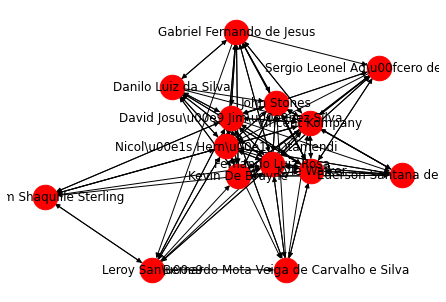

In [46]:
graph_team1 = pass_bet_team1[['playerName', 'reciever_name', 'pass_count']]
# convert the dataframe to a list of tuples
L1 = graph_team1.apply(tuple, axis=1).tolist()
# Draw the NetworkX graph of the Pass network
G1 = nx.DiGraph()
G1.add_weighted_edges_from(L1)

nx.draw(G1, node_size=600, with_labels=True, node_color='red')

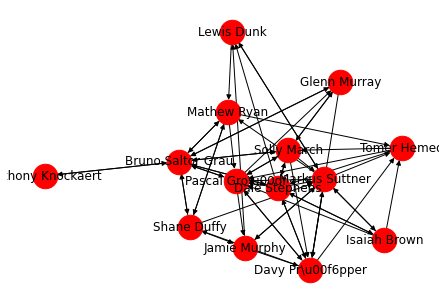

In [47]:
# Draw the NetworkX graph of the Pass network
G2 = nx.DiGraph()
G2.add_weighted_edges_from(L2)
nx.draw(G2, node_size=600, with_labels=True, node_color='red')

It is important to note that the average locations are not used in this simple passing network. Instead the default spring board layout of networkx is used instead.

# Network Metrics

There has been extensive research conducted on how passing network metrics are an effective alternative to traditional descriptive statstics in explaining a team's performances. Some of the network metrics that are used in this study are:

- In-degree centralization - measures the distribution of the number of connections coming into nodes. High in-degree centralization would occur when a single player receives all passes, while a low in-degree centralization score is achieved when each team member receives an equal number of passes (Grund,2012).

- Out-degree centralization - measures the distribution of the number of out-going connections from nodes. A high out-degree centralization score will be observed when a single player makes all the passes, while a low score is obtained when each member of the team makes the same number of passes (Grund, 2012).

- In-degree weight centralization - A high in-degree weight centralization metric in a football passing network would mean that there is a significant imbalance in the distribution of passes received by players. This could indicate that a few players are dominating possession and playmaking, potentially creating a dependency on those players and making the team more predictable and easier to defend against.

- Out-degree weight centralization - A high out-degree weight centralization metric in a football passing network would mean that there is a significant imbalance in the distribution of passes initiated by players. It would indicate a few players are initiating all the passes. 

- Network Density - The density measures the overall relationship among players. Considering football, values closer to 1 suggest that all players interact with each other, while a density of 0.5 indicates the presence of more ambiguous relationships.(Clemente et al., 2015)

- Network average clustering - The clustering coefficient evaluates a player's ability to foster alliances or groupings within a team. Conversely, the team's overall average clustering coefficient reveals its aptitude for collaborating and establishing subgroups within the team.



The following section explains the approach at calculating a these network metrics that have proved to be effective at explaining team performances according to previous research. 

The python package networkx returns centrality values for each node (or player in our instance). However, there is no function that returns a metric that allows us to asssess the overall centrality (called centralizatio) of the graph. The following function, "calculate_centralization" tries to do that by following a theoretical approach proposed by Freeman (Freeman, L. C. (1978). Centrality in social networks conceptual clarification. Social Networks, 1(3), 215-239) to calculate centralization of the entire graph using centrality values of each node (player). It takes the dictionary of centrality values returned by networkx, and produces a single centralization value for the entire graph.

In [48]:
#Freeman's approach to calculating centralization using normalized centrality values `
def calculate_centralization(centrality_dict):
    max_centrality = max(centrality_dict.values())
    n = len(centrality_dict)
    
    centralization = 0.0
    for centrality in centrality_dict.values():
        centralization += max_centrality - centrality
    
    max_possible_centralization = (n - 1) * (n - 2)   # Maximum possible centralization value
    normalized_centralization = centralization / max_possible_centralization
    
    return normalized_centralization

The normalize_dictionary function is used to normalise weight values. Normalising these values allows us to compare graphs of different number of nodes. This approach is also consistent with the way networkx returns normalised centrality measures.


In [49]:
#function to normalize weighted centralities 
def normalize_dictionary(dictionary):
    max_value = max(dictionary.values())
    normalized_dict = {key: value / max_value for key, value in dictionary.items()}
    return normalized_dict

In [50]:
#calculate network metrics without temporal information
in_degree_cent = nx.algorithms.centrality.in_degree_centrality(G1)
in_degree_centralization = calculate_centralization(in_degree_cent)

out_degree_cent = nx.algorithms.centrality.out_degree_centrality(G1)
out_degree_centralization = calculate_centralization(out_degree_cent)


in_degree_weight =  dict(G1.in_degree(weight='weight'))
in_degree_weight_centralization = calculate_centralization(normalize_dictionary(in_degree_weight))


out_degree_weight =  dict(G1.out_degree(weight='weight'))
out_degree_weight_centralization = calculate_centralization(normalize_dictionary(out_degree_weight))

# Compute the average clustering coefficient
avg_coeff = nx.average_clustering(G1)

# Compute the density
density = nx.density(G1)

In [51]:
#network metrics of graph without temporal information
print("in_deg_centr: %f" % (in_degree_centralization))
print("out_deg_centr: %f" %out_degree_centralization)
print("in_degree_weight_centralization: %f" %in_degree_weight_centralization)
print("out_degree_weight_centralization: %f" %out_degree_weight_centralization)
print("avg_coeff: %f" %avg_coeff)
print("density: %f" %density)


in_deg_centr: 0.029586
out_deg_centr: 0.029586
in_degree_weight_centralization: 0.044534
out_degree_weight_centralization: 0.042023
avg_coeff: 0.816425
density: 0.670330


The above scores indicate the metric values.

The above metrics were calculated without utilising the x,y co-ordinates. Now, I'm going to add the coordinate data and recalculate the metrics to see if there is any difference.

In [52]:
pass_bet_team1.rename({'x':'x_coord'}, axis='columns', inplace=True)
pass_bet_team1.rename({'y':'y_coord'}, axis='columns', inplace=True)


In [53]:
pass_bet_team2.rename({'x':'x_coord'}, axis='columns', inplace=True)
pass_bet_team2.rename({'y':'y_coord'}, axis='columns', inplace=True)


In [54]:
# create DataFrame of player positions
pos_df = pass_bet_team1[['playerName', 'x_coord', 'y_coord']].drop_duplicates('playerName').set_index('playerName')

# convert DataFrame to dictionary
pos_dict = pos_df.to_dict(orient='index')

# create DataFrame of player positions
pos_df2 = pass_bet_team2[['playerName', 'x_coord', 'y_coord']].drop_duplicates('playerName').set_index('playerName')

# convert DataFrame to dictionary
pos_dict2 = pos_df2.to_dict(orient='index')


In [55]:
#add temporal info to graph
# set node positions as attributes
nx.set_node_attributes(G1, pos_dict)

In [56]:
#calculate network metrics again
in_degree_cent = nx.algorithms.centrality.in_degree_centrality(G1)
in_degree_centralization = calculate_centralization(in_degree_cent)

out_degree_cent = nx.algorithms.centrality.out_degree_centrality(G1)
out_degree_centralization = calculate_centralization(out_degree_cent)


in_degree_weight =  dict(G1.in_degree(weight='weight'))
in_degree_weight_centralization = calculate_centralization(normalize_dictionary(in_degree_weight))


out_degree_weight =  dict(G1.out_degree(weight='weight'))
out_degree_weight_centralization = calculate_centralization(normalize_dictionary(out_degree_weight))

# Compute the average clustering coefficient
avg_coeff = nx.average_clustering(G1)

# Compute the density
density = nx.density(G1)

In [57]:
#network metrics of graph with temporal information
print("in_deg_centr: %f" % (in_degree_centralization))
print("out_deg_centr: %f" %out_degree_centralization)
print("in_degree_weight_centralization: %f" %in_degree_weight_centralization)
print("out_degree_weight_centralization: %f" %out_degree_weight_centralization)
print("avg_coeff: %f" %avg_coeff)
print("density: %f" %density)


in_deg_centr: 0.029586
out_deg_centr: 0.029586
in_degree_weight_centralization: 0.044534
out_degree_weight_centralization: 0.042023
avg_coeff: 0.816425
density: 0.670330


The metrics are exactly the same even after adding the x,y co-ordinates to the nodes as attributes. This indicates that the metrics that are being caclualted do no involve spatio-temporal data.

## Plotting graphs using temporal data

Let's try and re-plot the graph using the x,y co-ordinates.

In [58]:
import matplotlib.pyplot as plt

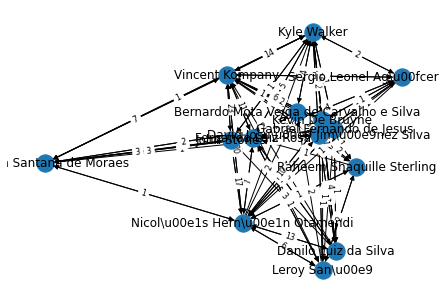

In [59]:
#need to use average locations for above




# create an empty directed graph
G = nx.DiGraph()

# add edges for successful passes
for index, row in pass_bet_team1.iterrows():
    if row['pass_count'] > 0:
        G.add_edge(row['playerName'], row['reciever_name'], weight=row['pass_count'])


# draw the graph with node positions and edge labels
pos = {k: (pos_dict[k]['x_coord'], pos_dict[k]['y_coord']) for k in pos_dict}
nx.draw(G, pos, with_labels=True)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()


Explain the graph

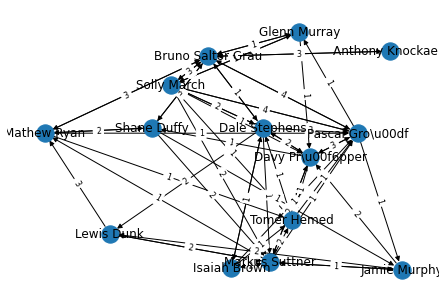

In [60]:


# create an empty directed graph
G2 = nx.DiGraph()

# add edges for successful passes
for index, row in pass_bet_team2.iterrows():
    if row['pass_count'] > 0:
        G2.add_edge(row['playerName'], row['reciever_name'], weight=row['pass_count'])


# draw the graph with node positions and edge labels
pos = {k: (pos_dict2[k]['x_coord'], pos_dict2[k]['y_coord']) for k in pos_dict2}


nx.draw(G2, pos, with_labels=True)

edge_labels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels, font_size=8)

plt.show()


Explain the graph

After observing the in-degree centralisation and out-degree centralisation metric values being exatly the same, I decided to see the distribution of the passes per player for both values since the centrality values are dependent on the number of passes a player recieves (in-degree) and the number of passes intiated by a player (out-degree). 

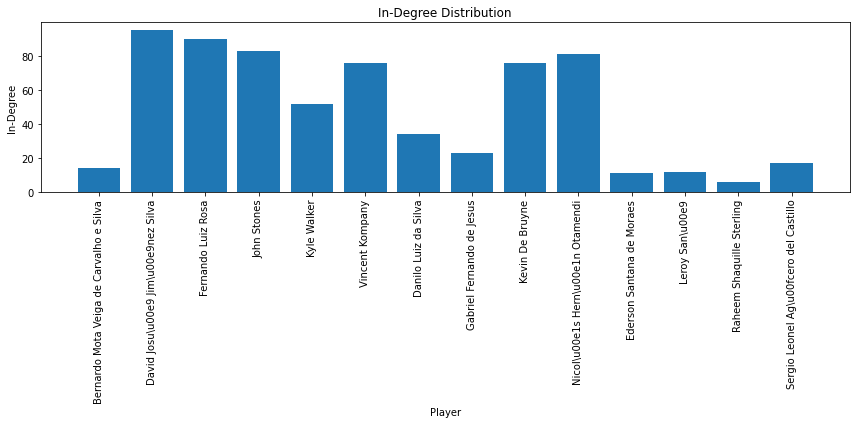

In [61]:
players = list(in_degree_weight.keys())
counts = list(in_degree_weight.values())

plt.figure(figsize=(12, 6))
plt.bar(players, counts)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('In-Degree')
plt.title('In-Degree Distribution')
plt.tight_layout()
plt.show()

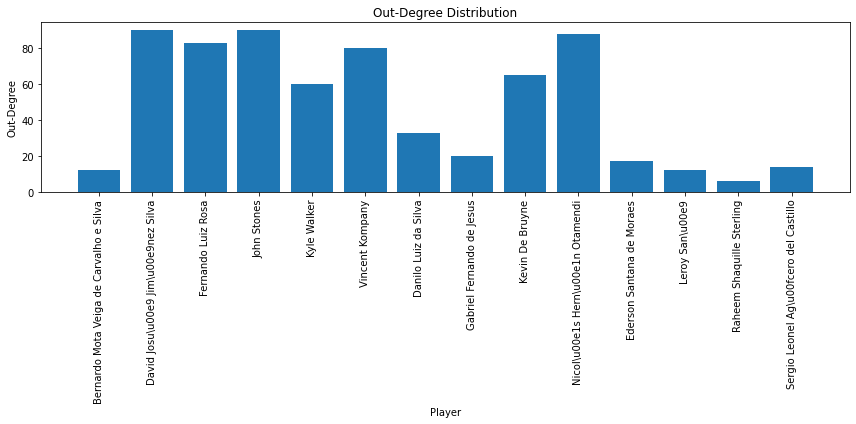

In [62]:
players = list(out_degree_weight.keys())
counts = list(out_degree_weight.values())

plt.figure(figsize=(12, 6))
plt.bar(players, counts)
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Out-Degree')
plt.title('Out-Degree Distribution')
plt.tight_layout()
plt.show()

The distribution of in-degree and out-degree passes for each player are identical. This makes sense because when you think about it, a player can initaite a pass only after he recieves it (unless its kick off or a restart after a foul/throw in). This leads to similar centrality values, and thus same centralization values for in-degree and out-degree. 

In hindight, a more diverse network metrics that capture different behavriours of a team network could have been chosen. 

# Extending to all matches

So far the passing network that was created and the resulting network metrics are based on one match. But the goal is to create a dataset that contains network metrics of every team involved in every match of the dataset. This would allow us to then test the significance of network metrics's relationship with team performances. 

The following code extends the processes explained above for one match, to all the matches available in the dataset. The resulting dataframe called "final_df3" contains network metrics of each team in each match, as well as the opposition's network metrics. The opposition metrics is included because the statistical test that is to be conducted (explained later) is designed to take into account random effects such as opposition data.

Each match contains 2 rows - one for the home team metrics vs opposition metrics, and home goals scored. The second is for away team metrics, opposition metrics, and away team goals. This way all teams are taken into account for every match they play, whilst taking into account opposition metrics.

### First iteration

This is was my first approach at creating the needed dataframe. You will notice it does not follow the approach explained above. The main difference is in the way the network metrics are calculated (they do not use the functions described earlier).

In [63]:
import re

In [64]:
# create an empty dataframe with columns
final_df3 = pd.DataFrame(columns=['match_id', 'team_id', 'opponent_id', 'goals', 'in_degree_centralization', 'out_degree_centralization', 'in_degree_weight_centralization' , 'out_degree_weight_centralization', 'avg_coeff', 'density','in_degree_centralization_opp', 'out_degree_centralization_opp', 'in_degree_weight_centralization_opp' , 'out_degree_weight_centralization_opp', 'avg_coeff_opp', 'density_opp'])


for match in pass_df.matchId.unique():
    test_df = pass_df[pass_df.matchId==match]
    
    #extract goals
    numbers = list(map(int, re.findall(r'\d+', test_df.label.iloc[0])))
    home_goals = numbers[0]
    away_goals = numbers[1]
    
    #find pass reciever using shift(-1)
    test_df[["receiver",'reciever_name','reciever_teamId']] = test_df[['playerId','playerName','teamId']].shift(-1)

    # drop unsuccessful passes

    # drop rows where teamId does not equal reciever_teamId
    mask = test_df['teamId'] != test_df['reciever_teamId']
    filtered_df = test_df[mask]
    test_df = test_df.drop(index=filtered_df.index)
    
    #drop a few more rows where passer and reciever are the same
    test_df = test_df.drop(index=test_df[test_df.playerName==test_df.reciever_name].index)
    
    #split df into home and away 
    team1_df = test_df[test_df.teamId==test_df.teamId.unique()[0]]
    team2_df = test_df[test_df.teamId==test_df.teamId.unique()[1]]
    
    
    # find the average locations of the passer in team1
    avg_loc_team1 = team1_df.groupby('playerName').agg({'x':['mean'], 'y': ['mean', 'count']})
    avg_loc_team1.columns=['x', 'y', 'count']
    # find the average locations of the passer for team2
    avg_loc_team2 = team2_df.groupby('playerName').agg({'x':['mean'], 'y': ['mean', 'count']})
    avg_loc_team2.columns=['x', 'y', 'count']

    # Number of passes between each player for team1
    team1_df = team1_df.reset_index()
    pass_bet_team1 = team1_df.groupby(['playerName', 'reciever_name']).index.count().reset_index()
    
    
    # Number of passes between each player for team2
    team2_df = team2_df.reset_index()
    pass_bet_team2 = team2_df.groupby(['playerName', 'reciever_name']).index.count().reset_index()
    
    
    #merge dataframes to include all info, for team1 and team2
    pass_bet_team1 = pass_bet_team1.merge(avg_loc_team1, left_on = 'playerName', right_index=True)
    pass_bet_team2 = pass_bet_team2.merge(avg_loc_team2, left_on = 'playerName', right_index=True)
    
    #rename index to count for both team1 and team2
    pass_bet_team1.rename({'index':'pass_count'}, axis='columns', inplace=True)
    pass_bet_team2.rename({'index':'pass_count'}, axis='columns', inplace=True)
    
    
    pass_bet_team1.rename({'x':'x_coord'}, axis='columns', inplace=True)
    pass_bet_team1.rename({'y':'y_coord'}, axis='columns', inplace=True)

    pass_bet_team2.rename({'x':'x_coord'}, axis='columns', inplace=True)
    pass_bet_team2.rename({'y':'y_coord'}, axis='columns', inplace=True)

    # create DataFrame of player positions
    pos_df = pass_bet_team1[['playerName', 'x_coord', 'y_coord']].drop_duplicates('playerName').set_index('playerName')

    # convert DataFrame to dictionary
    pos_dict = pos_df.to_dict(orient='index')

    # create DataFrame of player positions
    pos_df2 = pass_bet_team2[['playerName', 'x_coord', 'y_coord']].drop_duplicates('playerName').set_index('playerName')

    # convert DataFrame to dictionary
    pos_dict2 = pos_df2.to_dict(orient='index')
    
    # create an empty directed graph
    G = nx.DiGraph()

    # add edges for successful passes
    for index, row in pass_bet_team1.iterrows():
        if row['pass_count'] > 0:
            G.add_edge(row['playerName'], row['reciever_name'], weight=row['pass_count'])
    
    # set node positions as attributes
    nx.set_node_attributes(G, pos_dict)


    # create an empty directed graph
    G2 = nx.DiGraph()

    # add edges for successful passes
    for index, row in pass_bet_team2.iterrows():
        if row['pass_count'] > 0:
            G2.add_edge(row['playerName'], row['reciever_name'], weight=row['pass_count'])

    
    # set node positions as attributes
    nx.set_node_attributes(G2, pos_dict2)


        # GET NETWORK METRICS FOR TEAM1
  
    in_degree_cent = nx.algorithms.centrality.in_degree_centrality(G)
    in_degree_cent_values = list(in_degree_cent.values())
    n = len(in_degree_cent_values)
    w = max(in_degree_cent_values)
    Cmax = (n-1) / n * (1 - 1 / w)
    Csum = sum([(Cmax - i) for i in in_degree_cent_values]) 
    in_degree_centralization = Cmax - Csum / (n - 2)
    
    
    out_degree_cent = nx.algorithms.centrality.out_degree_centrality(G)
    out_degree_cent_values = list(out_degree_cent.values())
    n = len(out_degree_cent_values)
    w = max(out_degree_cent_values)
    Cmax = (n-1) / n * (1 - 1 / w)
    Csum = sum([(Cmax - i) for i in in_degree_cent_values]) 
    out_degree_centralization = Cmax - Csum / (n - 2)
    
    
    in_degree_weight =  dict(G.in_degree(weight='weight'))
    in_degree_weight_values = list(in_degree_weight.values())
    n = len(in_degree_weight_values)
    w = max(in_degree_weight_values)
    Cmax = (n-1) / n * (1 - 1 / w)
    Csum = sum([(Cmax - i) for i in in_degree_weight_values]) 
    in_degree_weight_centralization = Cmax - Csum / (n - 2)
    
    
    out_degree_weight =  dict(G.out_degree(weight='weight'))
    out_degree_weight_values = list(out_degree_weight.values())
    n = len(out_degree_weight_values)
    w = max(out_degree_weight_values)
    Cmax = (n-1) / n * (w - 1) / w
    Csum = sum([(Cmax - i) for i in out_degree_weight_values]) 
    out_degree_weight_centralization = Cmax - Csum / (n - 2)
    
    
    # Compute the average clustering coefficient
    avg_coeff = nx.average_clustering(G)
    
    # Compute the density
    density = nx.density(G)
    
        # GET NETWORK METRICS FOR TEAM2
  
    in_degree_cent = nx.algorithms.centrality.in_degree_centrality(G2)
    in_degree_cent_values = list(in_degree_cent.values())
    n = len(in_degree_cent_values)
    w = max(in_degree_cent_values)
    Cmax = (n-1) / n * (1 - 1 / w)
    Csum = sum([(Cmax - i) for i in in_degree_cent_values]) 
    in_degree_centralization2 = Cmax - Csum / (n - 2)
    
    
    out_degree_cent = nx.algorithms.centrality.out_degree_centrality(G2)
    out_degree_cent_values = list(out_degree_cent.values())
    n = len(out_degree_cent_values)
    w = max(out_degree_cent_values)
    Cmax = (n-1) / n * (1 - 1 / w)
    Csum = sum([(Cmax - i) for i in in_degree_cent_values]) 
    out_degree_centralization2 = Cmax - Csum / (n - 2)
    
    
    in_degree_weight =  dict(G2.in_degree(weight='weight'))
    in_degree_weight_values = list(in_degree_weight.values())
    n = len(in_degree_weight_values)
    w = max(in_degree_weight_values)
    Cmax = (n-1) / n * (1 - 1 / w)
    Csum = sum([(Cmax - i) for i in in_degree_weight_values]) 
    in_degree_weight_centralization2 = Cmax - Csum / (n - 2)
    
    
    out_degree_weight =  dict(G2.out_degree(weight='weight'))
    out_degree_weight_values = list(out_degree_weight.values())
    n = len(out_degree_weight_values)
    w = max(out_degree_weight_values)
    Cmax = (n-1) / n * (w - 1) / w
    Csum = sum([(Cmax - i) for i in out_degree_weight_values]) 
    out_degree_weight_centralization2 = Cmax - Csum / (n - 2)
    # Compute the average clustering coefficient
    avg_coeff2 = nx.average_clustering(G2)
    # Compute the density
    density2 = nx.density(G2)
    
   

    final_df3 = final_df3.append({'match_id':match, 'team_id':team1_df.teamId.iloc[0],'opponent_id':team2_df.teamId.iloc[0],'goals':home_goals,'in_degree_centralization':in_degree_centralization, 'out_degree_centralization':out_degree_centralization, 'in_degree_weight_centralization':in_degree_weight_centralization , 'out_degree_weight_centralization':out_degree_weight_centralization, 'avg_coeff':avg_coeff, 'density':density, 'in_degree_centralization_opp':in_degree_centralization2, 'out_degree_centralization_opp':out_degree_centralization2, 'in_degree_weight_centralization_opp':in_degree_weight_centralization2 , 'out_degree_weight_centralization_opp':out_degree_weight_centralization2, 'avg_coeff_opp':avg_coeff2, 'density_opp':density2 },ignore_index=True)
    final_df3 = final_df3.append({'match_id':match, 'team_id':team2_df.teamId.iloc[0],'opponent_id':team1_df.teamId.iloc[0],'goals':away_goals,'in_degree_centralization':in_degree_centralization2, 'out_degree_centralization':out_degree_centralization2, 'in_degree_weight_centralization':in_degree_weight_centralization2 , 'out_degree_weight_centralization':out_degree_weight_centralization2, 'avg_coeff':avg_coeff2, 'density':density2, 'in_degree_centralization_opp':in_degree_centralization, 'out_degree_centralization_opp':out_degree_centralization, 'in_degree_weight_centralization_opp':in_degree_weight_centralization , 'out_degree_weight_centralization_opp':out_degree_weight_centralization, 'avg_coeff_opp':avg_coeff, 'density_opp':density },ignore_index=True)
    
    

In [65]:
final_df3

,match_id,team_id,opponent_id,goals,in_degree_centralization,out_degree_centralization,in_degree_weight_centralization,out_degree_weight_centralization,avg_coeff,density,in_degree_centralization_opp,out_degree_centralization_opp,in_degree_weight_centralization_opp,out_degree_weight_centralization_opp,avg_coeff_opp,density_opp
0,2499719.0,1609.0,1631.0,4.0,0.743666,0.730769,42.513747,42.513889,0.767155,0.626374,0.559249,0.581604,11.436717,11.436310,0.657294,0.439560
1,2499719.0,1631.0,1609.0,3.0,0.559249,0.581604,11.436717,11.436310,0.657294,0.439560,0.743666,0.730769,42.513747,42.513889,0.767155,0.626374
2,2499720.0,1625.0,1651.0,0.0,0.782051,0.782051,55.680201,55.680291,0.816425,0.670330,0.487752,0.523679,8.854342,8.854911,0.414872,0.335165
3,2499720.0,1651.0,1625.0,2.0,0.487752,0.523679,8.854342,8.854911,0.414872,0.335165,0.782051,0.782051,55.680201,55.680291,0.816425,0.670330
4,2499721.0,1646.0,1610.0,2.0,0.647203,0.647203,19.836963,19.837413,0.651570,0.519231,0.780409,0.780409,39.743590,39.743841,0.814281,0.647436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2500096.0,1639.0,10531.0,2.0,0.734954,0.753263,29.290709,29.291017,0.705528,0.608974,0.750000,0.762897,35.847080,35.847173,0.744502,0.642857
756,2500097.0,1624.0,1631.0,5.0,0.673153,0.688395,28.348273,28.348273,0.731391,0.565934,0.572070,0.572070,12.601190,12.601967,0.554336,0.450549
757,2500097.0,1631.0,1624.0,4.0,0.572070,0.572070,12.601190,12.601967,0.554336,0.450549,0.673153,0.688395,28.348273,28.348273,0.731391,0.565934
758,2500098.0,1633.0,1623.0,3.0,0.724435,0.724435,30.515198,30.515198,0.798508,0.609890,0.660256,0.673153,21.682346,21.682011,0.746504,0.565934


The reason why there are errors with this approach is because the centralistion value are inaccurately calculated from the centrality measures returned by networkx for each node. Moreover, this approach fails to normalise the weight centralisation (in-degree and out-degree) before calculating the respective centralisation values. Normalised values should be within the range of 0 to 1. However, you can see the in-degree and out-degree weight centralisation values range much higher than this. The purpose of normalisation is so the graphs of different sizes (different number of nodes) can be scaled to the same range that allows comparison. 

In [66]:
final_df3['goals'] = final_df3['goals'].astype(int)
final_df3['match_id'] = final_df3['match_id'].astype(int)
final_df3['opponent_id'] = final_df3['opponent_id'].astype(int)
final_df3['team_id'] = final_df3['team_id'].astype(int)


Data types of a few columns needed to be changed in order for the statistical test to work.

In [67]:
final_df3.dtypes

match_id                                  int64
team_id                                   int64
opponent_id                               int64
goals                                     int64
in_degree_centralization                float64
out_degree_centralization               float64
in_degree_weight_centralization         float64
out_degree_weight_centralization        float64
avg_coeff                               float64
density                                 float64
in_degree_centralization_opp            float64
out_degree_centralization_opp           float64
in_degree_weight_centralization_opp     float64
out_degree_weight_centralization_opp    float64
avg_coeff_opp                           float64
density_opp                             float64
dtype: object

### Testing 

The following code creates a mixed-model linear regression test to see the relationship between the network metrics of a team and the number of goals scored by that team, while taking into account random effects like opposition network metrics and different networks per match and team. This is the approach followed by Thomas Grund in 2012 when he conducted a similar research.

This is part of the longitudanal analysis that is done in order to understand the relationship between network metrics and the goals scored by a team. 

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Create a formula for the mixed effects model, including the opponent's metrics
formula = "goals ~ in_degree_centralization + out_degree_centralization + in_degree_weight_centralization + out_degree_weight_centralization + avg_coeff + density + \
           in_degree_centralization_opp + out_degree_centralization_opp + in_degree_weight_centralization_opp + out_degree_weight_centralization_opp + \
           avg_coeff_opp + density_opp + (1|match_id) + (1|team_id)"


# Create a formula for the mixed effects model, including the opponent's metrics
#formula = "goals ~ in_degree_centralization + out_degree_centralization + in_degree_weight_centralization + avg_coeff + density + in_degree_centralization_opp + out_degree_centralization_opp + in_degree_weight_centralization_opp + avg_coeff_opp + density_opp + (1|match_id) + (1|team_id)"

# Fit the mixed effects model
model = smf.mixedlm(formula, final_df3, groups=final_df3["match_id"]+final_df3["team_id"])
result = model.fit()

# Print the model summary
print(result.summary())




                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           goals     
No. Observations:           760               Method:                       REML      
No. Groups:                 380               Scale:                        1.6005    
Min. group size:            1                 Log-Likelihood:               -1255.0560
Max. group size:            8                 Converged:                    Yes       
Mean group size:            2.0                                                       
--------------------------------------------------------------------------------------
                                      Coef.   Std.Err.   z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------------------
Intercept                            -318.488 1051.714 -0.303 0.762 -2379.809 1742.833
in_degree_centralization               -1.211    3.295 -0.367 0.713 

/usr/local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


- Network Metrics: The coefficients for the team's own network metrics, such as in_degree_centralization, out_degree_centralization, in_degree_weight_centralization, out_degree_weight_centralization, avg_coeff, and density, are not statistically significant at the 5% level. This means that there is no significant evidence to suggest that these network metrics have a linear relationship with the number of goals scored by the team.

- Opposition Team's Network Metrics: Among the opposition team's network metrics, the coefficient for out_degree_centralization_opp is statistically significant (p=0.015). A negative coefficient value of -7.615 suggests that as the opposition team's out-degree centralization increases, the team tends to score fewer goals. However, the coefficients for the other opposition team's network metrics, such as in_degree_centralization_opp, in_degree_weight_centralization_opp, out_degree_weight_centralization_opp, avg_coeff_opp, and density_opp, are not statistically significant.

- Random Effects: The model includes random effects for match_id and team_id. The coefficient values of 0.000 for both random effects indicate that there is no significant variability between matches or between teams in terms of their impact on the number of goals scored.

Overall, the results suggest that the opposition team's out-degree centralization has a significant association with the number of goals scored by the team, while the team's own network metrics and other opposition team's network metrics do not have a statistically significant relationship with goals scored.

However, since the approach is flawed, it's advisable to look at the results from the second iteration only

### Second iteration 

The second iteration corrects the errors mentioned above by changing the approach of calcuating centalisation values using the centrality values reutned by netowrkx. It now uses the functions described earlier, "calculate_centralization" and "normalize_dictionary". 
 This approach normalises the in-degree and out-degree values before centralization. 

In [69]:
# create an empty dataframe with columns
final_df = pd.DataFrame(columns=['match_id', 'team_id', 'opponent_id', 'goals', 'in_degree_centralization', 'out_degree_centralization', 'in_degree_weight_centralization' , 'out_degree_weight_centralization', 'avg_coeff', 'density','in_degree_centralization_opp', 'out_degree_centralization_opp', 'in_degree_weight_centralization_opp' , 'out_degree_weight_centralization_opp', 'avg_coeff_opp', 'density_opp'])


for match in pass_df.matchId.unique():
    test_df = pass_df[pass_df.matchId==match]
    
    #extract goals
    numbers = list(map(int, re.findall(r'\d+', test_df.label.iloc[0])))
    home_goals = numbers[0]
    away_goals = numbers[1]
    
    #find pass reciever using shift(-1)
    test_df[["receiver",'reciever_name','reciever_teamId']] = test_df[['playerId','playerName','teamId']].shift(-1)

    # drop unsuccessful passes

    # drop rows where teamId does not equal reciever_teamId
    mask = test_df['teamId'] != test_df['reciever_teamId']
    filtered_df = test_df[mask]
    test_df = test_df.drop(index=filtered_df.index)
    
    #drop a few more rows where passer and reciever are the same
    test_df = test_df.drop(index=test_df[test_df.playerName==test_df.reciever_name].index)
    
    #split df into home and away 
    team1_df = test_df[test_df.teamId==test_df.teamId.unique()[0]]
    team2_df = test_df[test_df.teamId==test_df.teamId.unique()[1]]
    
    
    # find the average locations of the passer in team1
    avg_loc_team1 = team1_df.groupby('playerName').agg({'x':['mean'], 'y': ['mean', 'count']})
    avg_loc_team1.columns=['x', 'y', 'count']
    # find the average locations of the passer for team2
    avg_loc_team2 = team2_df.groupby('playerName').agg({'x':['mean'], 'y': ['mean', 'count']})
    avg_loc_team2.columns=['x', 'y', 'count']

    # Number of passes between each player for team1
    team1_df = team1_df.reset_index()
    pass_bet_team1 = team1_df.groupby(['playerName', 'reciever_name']).index.count().reset_index()
    
    
    # Number of passes between each player for team2
    team2_df = team2_df.reset_index()
    pass_bet_team2 = team2_df.groupby(['playerName', 'reciever_name']).index.count().reset_index()
    
    
    #merge dataframes to include all info, for team1 and team2
    pass_bet_team1 = pass_bet_team1.merge(avg_loc_team1, left_on = 'playerName', right_index=True)
    pass_bet_team2 = pass_bet_team2.merge(avg_loc_team2, left_on = 'playerName', right_index=True)
    
    #rename index to count for both team1 and team2
    pass_bet_team1.rename({'index':'pass_count'}, axis='columns', inplace=True)
    pass_bet_team2.rename({'index':'pass_count'}, axis='columns', inplace=True)
    
    
    pass_bet_team1.rename({'x':'x_coord'}, axis='columns', inplace=True)
    pass_bet_team1.rename({'y':'y_coord'}, axis='columns', inplace=True)

    pass_bet_team2.rename({'x':'x_coord'}, axis='columns', inplace=True)
    pass_bet_team2.rename({'y':'y_coord'}, axis='columns', inplace=True)

    # create DataFrame of player positions
    pos_df = pass_bet_team1[['playerName', 'x_coord', 'y_coord']].drop_duplicates('playerName').set_index('playerName')

    # convert DataFrame to dictionary
    pos_dict = pos_df.to_dict(orient='index')

    # create DataFrame of player positions
    pos_df2 = pass_bet_team2[['playerName', 'x_coord', 'y_coord']].drop_duplicates('playerName').set_index('playerName')

    # convert DataFrame to dictionary
    pos_dict2 = pos_df2.to_dict(orient='index')
    
    # create an empty directed graph
    G = nx.DiGraph()

    # add edges for successful passes
    for index, row in pass_bet_team1.iterrows():
        if row['pass_count'] > 0:
            G.add_edge(row['playerName'], row['reciever_name'], weight=row['pass_count'])
    
    # set node positions as attributes
    nx.set_node_attributes(G, pos_dict)


    # create an empty directed graph
    G2 = nx.DiGraph()

    # add edges for successful passes
    for index, row in pass_bet_team2.iterrows():
        if row['pass_count'] > 0:
            G2.add_edge(row['playerName'], row['reciever_name'], weight=row['pass_count'])

    
    # set node positions as attributes
    nx.set_node_attributes(G2, pos_dict2)

    

        # GET NETWORK METRICS FOR TEAM1
  
    in_degree_cent = nx.algorithms.centrality.in_degree_centrality(G)
    in_degree_centralization = calculate_centralization(in_degree_cent)
    
    
    out_degree_cent = nx.algorithms.centrality.out_degree_centrality(G)
    out_degree_centralization = calculate_centralization(out_degree_cent)
    
    
    in_degree_weight =  dict(G.in_degree(weight='weight'))
    in_degree_weight_centralization = calculate_centralization(normalize_dictionary(in_degree_weight))
    
    
    
    out_degree_weight =  dict(G.out_degree(weight='weight'))
    out_degree_weight_centralization = calculate_centralization(normalize_dictionary(out_degree_weight))
    
    # Compute the average clustering coefficient
    avg_coeff = nx.average_clustering(G)
    
    # Compute the density
    density = nx.density(G)
    
    
    
        # GET NETWORK METRICS FOR TEAM2
  
    in_degree_cent = nx.algorithms.centrality.in_degree_centrality(G2)
    in_degree_centralization2 = calculate_centralization(in_degree_cent)
    
    
    out_degree_cent = nx.algorithms.centrality.out_degree_centrality(G2)
    out_degree_centralization2 = calculate_centralization(out_degree_cent)
    
    
    in_degree_weight =  dict(G2.in_degree(weight='weight'))
    in_degree_weight_centralization2 = calculate_centralization(normalize_dictionary(in_degree_weight))
    
    
    
    out_degree_weight =  dict(G2.out_degree(weight='weight'))
    out_degree_weight_centralization2 = calculate_centralization(normalize_dictionary(out_degree_weight))
    
    # Compute the average clustering coefficient
    avg_coeff2 = nx.average_clustering(G2)
    
    # Compute the density
    density2 = nx.density(G2)
    
   

    final_df = final_df.append({'match_id':match, 'team_id':team1_df.teamId.iloc[0],'opponent_id':team2_df.teamId.iloc[0],'goals':home_goals,'in_degree_centralization':in_degree_centralization, 'out_degree_centralization':out_degree_centralization, 'in_degree_weight_centralization':in_degree_weight_centralization , 'out_degree_weight_centralization':out_degree_weight_centralization, 'avg_coeff':avg_coeff, 'density':density, 'in_degree_centralization_opp':in_degree_centralization2, 'out_degree_centralization_opp':out_degree_centralization2, 'in_degree_weight_centralization_opp':in_degree_weight_centralization2 , 'out_degree_weight_centralization_opp':out_degree_weight_centralization2, 'avg_coeff_opp':avg_coeff2, 'density_opp':density2 },ignore_index=True)
    final_df = final_df.append({'match_id':match, 'team_id':team2_df.teamId.iloc[0],'opponent_id':team1_df.teamId.iloc[0],'goals':away_goals,'in_degree_centralization':in_degree_centralization2, 'out_degree_centralization':out_degree_centralization2, 'in_degree_weight_centralization':in_degree_weight_centralization2 , 'out_degree_weight_centralization':out_degree_weight_centralization2, 'avg_coeff':avg_coeff2, 'density':density2, 'in_degree_centralization_opp':in_degree_centralization, 'out_degree_centralization_opp':out_degree_centralization, 'in_degree_weight_centralization_opp':in_degree_weight_centralization , 'out_degree_weight_centralization_opp':out_degree_weight_centralization, 'avg_coeff_opp':avg_coeff, 'density_opp':density },ignore_index=True)
    
    

In [70]:
final_df

,match_id,team_id,opponent_id,goals,in_degree_centralization,out_degree_centralization,in_degree_weight_centralization,out_degree_weight_centralization,avg_coeff,density,in_degree_centralization_opp,out_degree_centralization_opp,in_degree_weight_centralization_opp,out_degree_weight_centralization_opp,avg_coeff_opp,density_opp
0,2499719.0,1609.0,1631.0,4.0,0.026627,0.033531,0.050672,0.047666,0.767155,0.626374,0.029586,0.022682,0.042848,0.045192,0.657294,0.439560
1,2499719.0,1631.0,1609.0,3.0,0.029586,0.022682,0.042848,0.045192,0.657294,0.439560,0.026627,0.033531,0.050672,0.047666,0.767155,0.626374
2,2499720.0,1625.0,1651.0,0.0,0.029586,0.029586,0.044534,0.042023,0.816425,0.670330,0.025148,0.018245,0.049020,0.046474,0.414872,0.335165
3,2499720.0,1651.0,1625.0,2.0,0.025148,0.018245,0.049020,0.046474,0.414872,0.335165,0.029586,0.029586,0.044534,0.042023,0.816425,0.670330
4,2499721.0,1646.0,1610.0,2.0,0.030934,0.030934,0.050866,0.046402,0.651570,0.519231,0.026515,0.026515,0.052294,0.047319,0.814281,0.647436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2500096.0,1639.0,10531.0,2.0,0.030303,0.022096,0.040043,0.035548,0.705528,0.608974,0.032051,0.025148,0.056777,0.055128,0.744502,0.642857
756,2500097.0,1624.0,1631.0,5.0,0.032051,0.025148,0.046757,0.046757,0.731391,0.565934,0.028600,0.028600,0.052022,0.047101,0.554336,0.450549
757,2500097.0,1631.0,1624.0,4.0,0.028600,0.028600,0.052022,0.047101,0.554336,0.450549,0.032051,0.025148,0.046757,0.046757,0.731391,0.565934
758,2500098.0,1633.0,1623.0,3.0,0.028107,0.028107,0.039553,0.039553,0.798508,0.609890,0.038955,0.032051,0.048780,0.052422,0.746504,0.565934


In [71]:
final_df['goals'] = final_df['goals'].astype(int)
final_df['match_id'] = final_df['match_id'].astype(int)
final_df['opponent_id'] = final_df['opponent_id'].astype(int)
final_df['team_id'] = final_df['team_id'].astype(int)


### Testing second iteration

The same test is conducted on the corrected dataset "final_df".

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Create a formula for the mixed effects model, including the opponent's metrics
formula = "goals ~ in_degree_centralization + out_degree_centralization + in_degree_weight_centralization + out_degree_weight_centralization + avg_coeff + density + \
           in_degree_centralization_opp + out_degree_centralization_opp + in_degree_weight_centralization_opp + out_degree_weight_centralization_opp + \
           avg_coeff_opp + density_opp + (1|match_id) + (1|team_id)"


# Create a formula for the mixed effects model, including the opponent's metrics
#formula = "goals ~ in_degree_centralization + out_degree_centralization + in_degree_weight_centralization + avg_coeff + density + in_degree_centralization_opp + out_degree_centralization_opp + in_degree_weight_centralization_opp + avg_coeff_opp + density_opp + (1|match_id) + (1|team_id)"

# Fit the mixed effects model
model = smf.mixedlm(formula, final_df, groups=final_df["match_id"]+final_df["team_id"])
result = model.fit()

# Print the model summary
print(result.summary())

                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           goals     
No. Observations:           760               Method:                       REML      
No. Groups:                 380               Scale:                        1.6120    
Min. group size:            1                 Log-Likelihood:               -1243.2009
Max. group size:            8                 Converged:                    Yes       
Mean group size:            2.0                                                       
--------------------------------------------------------------------------------------
                                      Coef.   Std.Err.   z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------------------
Intercept                            -439.423 1058.721 -0.415 0.678 -2514.479 1635.632
in_degree_centralization              -16.506    9.086 -1.817 0.069 

/usr/local/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


Network Metrics: None of the team's own network metrics (in_degree_centralization, out_degree_centralization, in_degree_weight_centralization, out_degree_weight_centralization, avg_coeff, density) have statistically significant coefficients at the 5% level. This implies that there is no strong evidence to support a relationship between these network metrics and the number of goals scored by the team.

Opposition Team's Network Metrics: Similarly, none of the opposition team's network metrics (in_degree_centralization_opp, out_degree_centralization_opp, in_degree_weight_centralization_opp, out_degree_weight_centralization_opp, avg_coeff_opp, density_opp) have statistically significant coefficients at the 5% level. This suggests that there is no substantial evidence to indicate a relationship between these opposition team's network metrics and the number of goals scored.

Random Effects: The model includes random effects for match_id and team_id. The coefficient values of 0.000 for both random effects imply that there is no significant variability between matches or between teams in terms of their impact on the number of goals scored.

In the earlier iteration, the opposition out-degree centralisation had a significant relationship with the number of goals scored. However, with corrections made in this iteration, the significance is no longer held.

# Conclusion

Based on the information provided in the regression results, the p-value for the predictor "in_degree_centralization" is 0.069, which is greater than the commonly used significance level of 0.05. Therefore, you would fail to reject the null hypothesis and conclude that there is not enough evidence to support a significant relationship between "in_degree_centralization" and goals scored by a team.

Similarly, the p-values for the remaining passing network metrics predictors are also greater than 0.05. Therefore, for each of those predictors, you would also fail to reject the null hypothesis and conclude that there is not enough evidence to support a significant relationship between those passing network metrics and goals scored by a team.

In summary, based on the given regression results, the null hypothesis that passing network metrics have no effect on goals scored by a team would be accepted.




